In [3]:
# General imports
import numpy as np # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster
from IPython.display import Video, display

# Custom imports
# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils

# Random seed 
np.random.seed(42)

In [4]:
# Initialize the Vicsek model.
radius = 1
L = 25
N = 50

In [5]:
# simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1)
simulator = pid.PID_Flock(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1, Kp=0.9812, Ki=0.1929, Kd=0.)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

In [6]:
df = utils.simulationDataToDataframe(simulationData)
df_labels = utils.clusters_over_time(df, func=utils.periodic_clustering_labels_pos_ang, k_coef=1.5, L=L, delta_theta = 0.5, min_samples=5)


In [7]:

df_centroids = utils.correct_labels_optimal_assignment(df_labels, df, "centroid", L)
df_contribution = utils.correct_labels_optimal_assignment(df_labels, df, "contribution", L)

Data created. Now plotting...


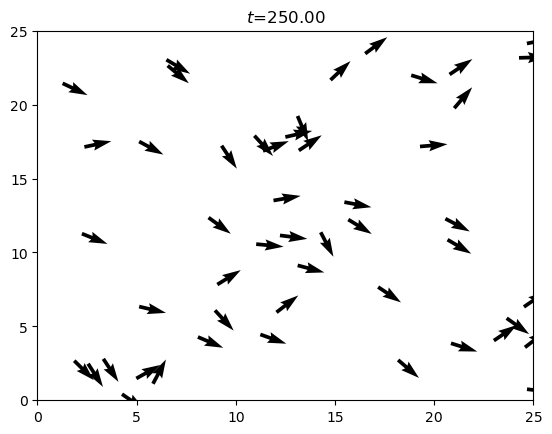

In [8]:
ani = visualisation.animate_simulation2D(df, L)
ani.save('nbdata/pid.mp4', writer='ffmpeg', fps=30)

In [9]:
ani = visualisation.animate_simulation2D_colored(df, df_labels, L, annotateBool=True)
ani.save('nbdata/pid_cluster_naive.mp4', writer='ffmpeg', fps=30)

In [ ]:
ani = visualisation.animate_simulation2D_colored(df, df_centroids, L, annotateBool=True)
ani.save('nbdata/pid_centroids.mp4', writer='ffmpeg', fps=30)

In [ ]:
ani = visualisation.animate_simulation2D_colored(df, df_contribution, L, annotateBool=True)
ani.save('nbdata/pid_contribution.mp4', writer='ffmpeg', fps=30)